# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [142]:
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [143]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df_head = pd.read_csv(url).head(10)
df_head

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [145]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

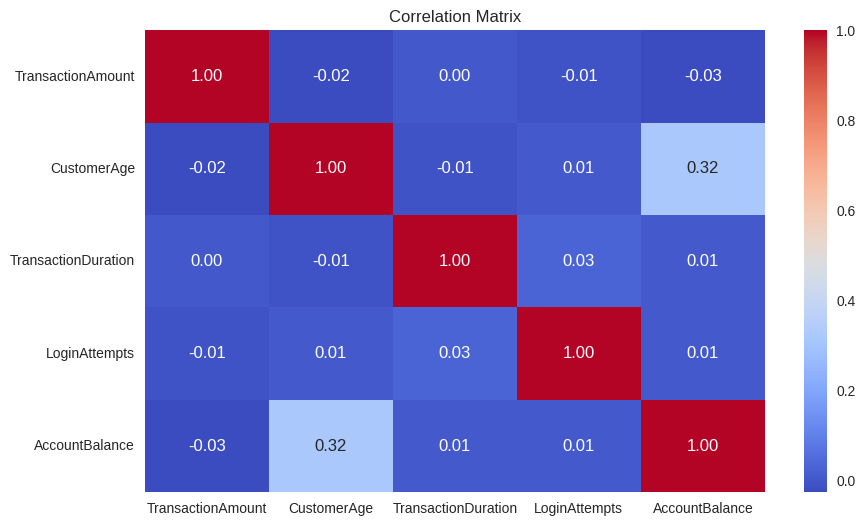

In [146]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

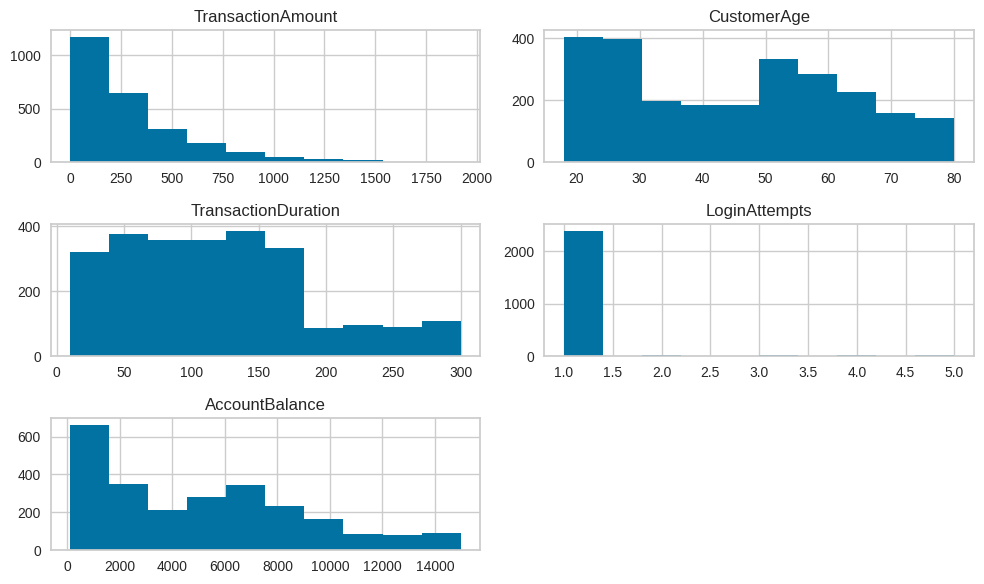

In [147]:
numeric_df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

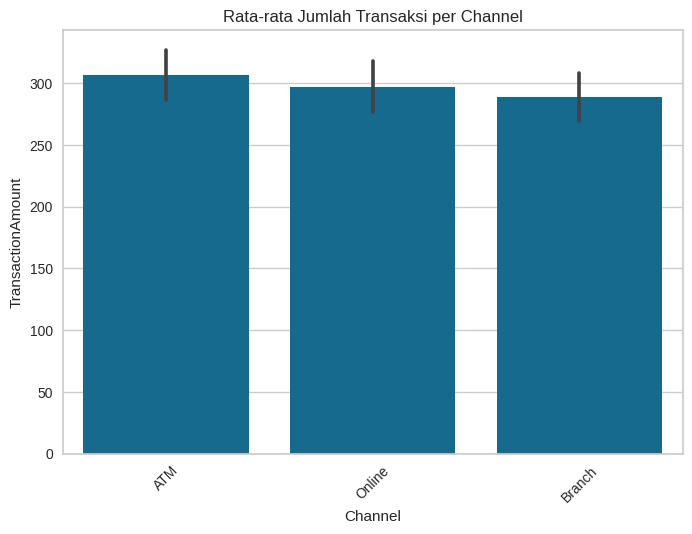

In [148]:
sns.barplot(data=df, x='Channel', y='TransactionAmount', estimator='mean')
plt.title('Rata-rata Jumlah Transaksi per Channel')
plt.xticks(rotation=45)
plt.show()



# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [149]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [150]:
df.duplicated().sum()

np.int64(21)

In [151]:
numeric_cols = df.select_dtypes(include='number').columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols].head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [152]:
df = df.drop(columns=[
    'TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate',
    'DeviceID', 'IP Address', 'MerchantID'
])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832
1,0.195940,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055
2,0.065680,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637
3,0.096016,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198
4,0.006874,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591


In [153]:
categorical_cols = [
    col for col in df.select_dtypes(include='object').columns
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,1,36,0,0.838710,0,0.244828,0.0,0.336832
1,0.195940,1,15,0,0.806452,0,0.451724,0.0,0.918055
2,0.065680,1,23,2,0.016129,3,0.158621,0.0,0.068637
3,0.096016,1,33,2,0.129032,3,0.051724,0.0,0.569198
4,0.006874,0,1,2,NaN,3,0.648276,0.0,0.492591


In [154]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [155]:
df = df.dropna()
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [156]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [157]:
numeric_cols = df.select_dtypes(include='number').columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

outliers_count = outliers_iqr.sum()
print(outliers_count)


TransactionAmount      106
TransactionType        566
Location                 0
Channel                  0
CustomerAge              0
CustomerOccupation       0
TransactionDuration      0
LoginAttempts          114
AccountBalance           0
dtype: int64


In [158]:
for col in ['TransactionAmount', 'LoginAttempts']:
    median_value = df[col].median()
    df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), median_value)
outliers_iqr = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
outliers_count = outliers_iqr.sum()
print(outliers_count)

TransactionAmount        0
TransactionType        566
Location                 0
Channel                  0
CustomerAge              0
CustomerOccupation       0
TransactionDuration      0
LoginAttempts            0
AccountBalance           0
dtype: int64


<ipython-input-158-6cd991f334ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), median_value)
<ipython-input-158-6cd991f334ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), median_value)


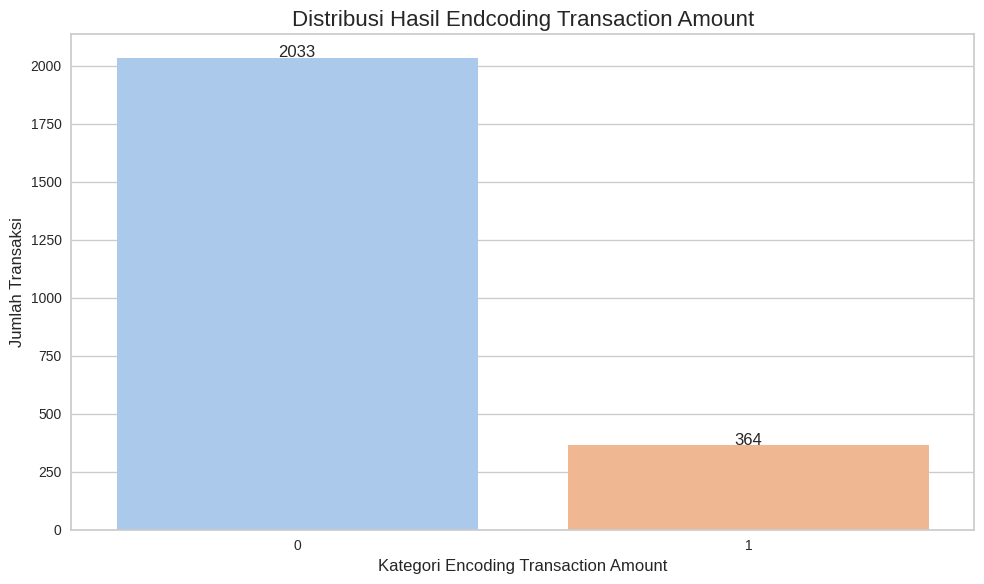

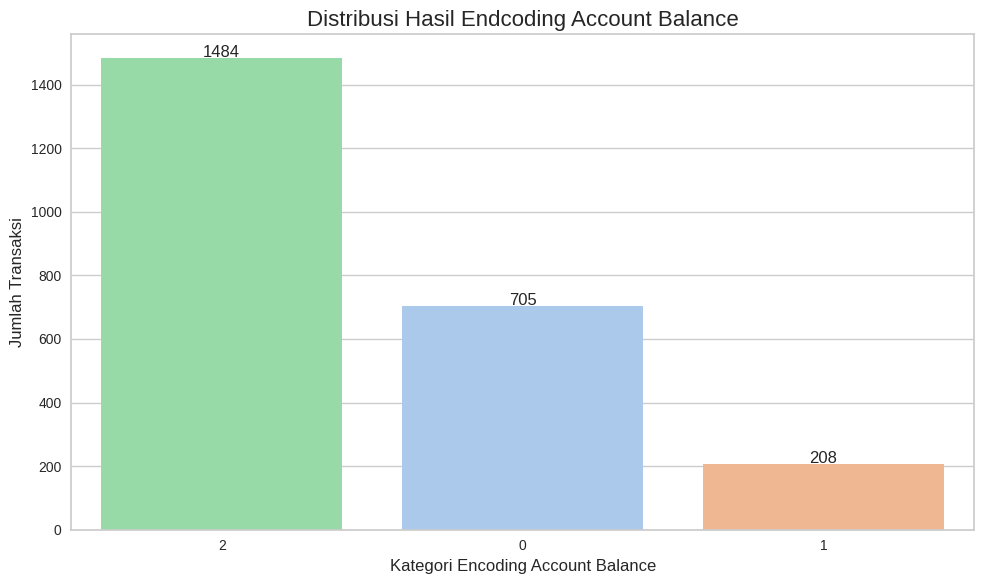

In [177]:
bins = [0.0, 0.25, 0.5, 0.75, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High']

df['TransactionAmount'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels, include_lowest=True)
df['AccountBalance'] = pd.cut(df['AccountBalance'], bins=bins, labels=labels, include_lowest=True)

le = LabelEncoder()
df['TransactionAmount'] = le.fit_transform(df['TransactionAmount'])
df['AccountBalance'] = le.fit_transform(df['AccountBalance'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TransactionAmount', hue='TransactionAmount', order=df['TransactionAmount'].value_counts()[df['TransactionAmount'].value_counts() > 0].index, palette='pastel', legend=False)

plt.title("Distribusi Hasil Endcoding Transaction Amount", fontsize=16)
plt.xlabel("Kategori Encoding Transaction Amount", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 2, f'{int(p.get_height())}', ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AccountBalance', hue='AccountBalance', order=df['AccountBalance'].value_counts()[df['AccountBalance'].value_counts() > 0].index, palette='pastel', legend=False)

plt.title("Distribusi Hasil Endcoding Account Balance", fontsize=16)
plt.xlabel("Kategori Encoding Account Balance", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 2, f'{int(p.get_height())}', ha='center')

plt.tight_layout()
plt.show()

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [160]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.0,2397.000000
mean,0.848144,0.788903,21.375887,1.013350,0.429441,1.531498,0.377573,0.0,1.976637
std,0.358957,0.437774,12.414387,0.831248,0.287683,1.153653,0.242403,0.0,1.041840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,1.000000
50%,1.000000,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,2.000000
75%,1.000000,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,3.000000
max,1.000000,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,3.000000


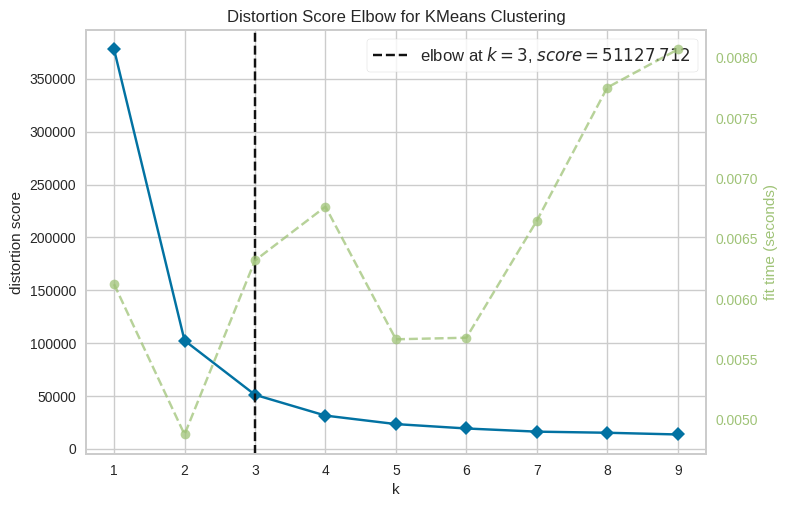

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [161]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df)
visualizer.show()


In [162]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster (CustomerAge & AccountBalance):")
    for cluster_id in range(k):
        cluster_data = df[df['cluster'] == cluster_id]

        mean_age = cluster_data['CustomerAge'].mean()
        mean_balance = cluster_data['AccountBalance'].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata CustomerAge    : {mean_age:.4f}")
        print(f"Rata-rata AccountBalance : {mean_balance:.4f}")

analyze_clusters(df, kmeans.labels_, k)

Analisis Karakteristik Setiap Cluster (CustomerAge & AccountBalance):

Cluster 1:
Rata-rata CustomerAge    : 0.4316
Rata-rata AccountBalance : 1.9654

Cluster 2:
Rata-rata CustomerAge    : 0.4394
Rata-rata AccountBalance : 1.9696

Cluster 3:
Rata-rata CustomerAge    : 0.4154
Rata-rata AccountBalance : 1.9973


Jalankan cell code ini untuk menyimpan model kamu.

In [163]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [164]:
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Nilai Silhouette Score: {silhouette_avg}")


Nilai Silhouette Score: 0.5318859460223152


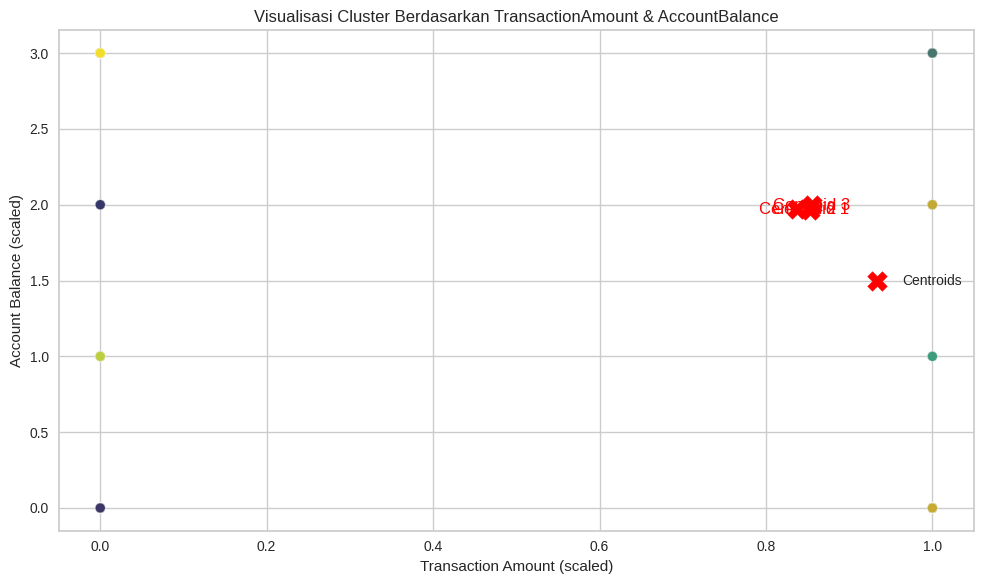

In [165]:
X_plot = df[['TransactionAmount', 'AccountBalance']].values
labels = df['cluster'].values
centroids = kmeans.cluster_centers_

centroids_plot = centroids[:, [df.columns.get_loc('TransactionAmount'), df.columns.get_loc('AccountBalance')]]

plt.figure(figsize=(10, 6))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids_plot[:, 0], centroids_plot[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, (x, y) in enumerate(centroids_plot):
    plt.text(x, y, f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster Berdasarkan TransactionAmount & AccountBalance')
plt.xlabel('Transaction Amount (scaled)')
plt.ylabel('Account Balance (scaled)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

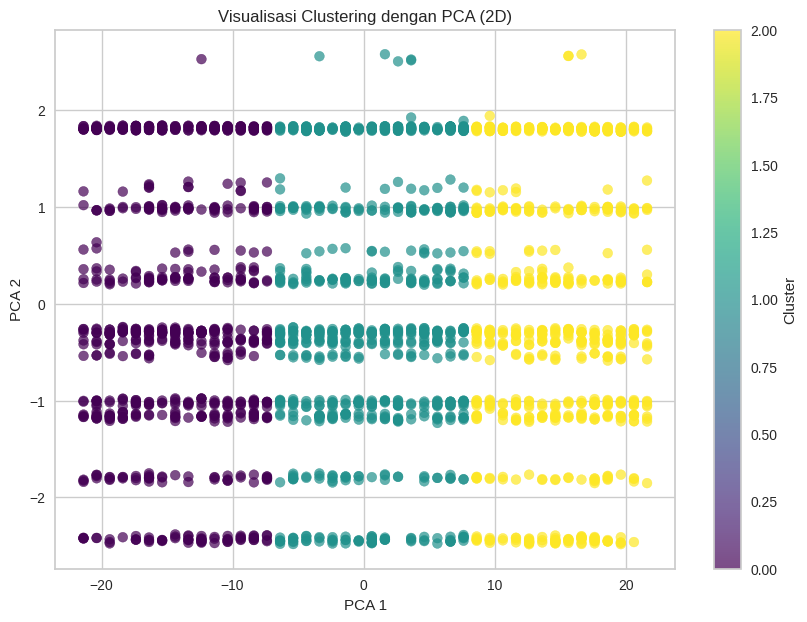

In [166]:
features_for_pca = df.select_dtypes(include=['float64', 'int64'])
if 'cluster' in features_for_pca.columns:
    features_for_pca = features_for_pca.drop(columns=['cluster'])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_for_pca)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title("Visualisasi Clustering dengan PCA (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


In [167]:
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

In [168]:
df.drop(columns=['PCA1', 'PCA2'], inplace=True, errors='ignore')

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**

**Cluster 1: (Pelanggan dengan Usia Muda dan Saldo Akun Tinggi)**
- **Rata-rata CustomerAge**: 0.4316
- **Rata-rata AccountBalance**: 1.9654

**Analisis**:
Cluster ini mencakup pelanggan dengan usia rata-rata yang sedikit lebih muda (berkisar antara 30 hingga 40 tahun) dan memiliki saldo akun yang relatif tinggi. Mereka kemungkinan merupakan pelanggan yang aktif dan memiliki daya beli yang lebih besar. Berdasarkan karakteristik ini, pelanggan dalam cluster ini mungkin lebih cenderung berinvestasi dan menggunakan layanan keuangan yang lebih kompleks.

---

**Cluster 2: (Pelanggan dengan Usia Tua dan Saldo Akun Cukup Stabil)**
- **Rata-rata CustomerAge**: 0.4394
- **Rata-rata AccountBalance**: 1.9696

**Analisis**:
Cluster ini terdiri dari pelanggan dengan usia yang sedikit lebih tua dan saldo akun yang hampir serupa dengan cluster pertama. Mereka mungkin lebih stabil dalam hal keuangan, memiliki penghasilan yang tetap, dan lebih berhati-hati dalam pengelolaan keuangan mereka. Mereka dapat lebih tertarik pada produk yang mendukung stabilitas dan keamanan, seperti deposito atau produk pensiun.

---

**Cluster 3: (Pelanggan dengan Usia Lebih Tua dan Saldo Akun Lebih Tinggi)**
- **Rata-rata CustomerAge**: 0.4154
- **Rata-rata AccountBalance**: 1.9973

**Analisis**:
Cluster ini memiliki pelanggan yang sedikit lebih tua dibandingkan dengan cluster lainnya, dengan saldo akun yang lebih tinggi. Mereka cenderung lebih berpengalaman dalam pengelolaan keuangan dan memiliki kebiasaan menabung atau berinvestasi lebih banyak. Mereka mungkin memiliki sedikit risiko dalam pengelolaan keuangan, dan mereka lebih suka layanan yang lebih aman dan dapat diandalkan.


In [169]:
# --- Statistik Deskriptif Global ---
numeric_features = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

categorical_features = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation'
]

# Statistik deskriptif numerik secara keseluruhan
numeric_describe = df[numeric_features].agg(['mean', 'std', 'min', 'max', 'median'])
print("Statistik Deskriptif untuk Fitur Numerik:")
print(numeric_describe)

# Modus kategorikal secara keseluruhan
categorical_mode = df[categorical_features].mode().iloc[0]
print("\nModus untuk Fitur Kategorikal:")
print(categorical_mode)

# --- Agregasi Berdasarkan Cluster ---
print("\n\nAgregasi Berdasarkan Cluster:\n")

# Agregasi numerik
agg_numeric = df.groupby("cluster")[numeric_features].agg(["mean", "min", "max"]).round(2)

# Agregasi kategorikal (modus per klaster)
agg_categorical = df.groupby("cluster")[categorical_features].agg(lambda x: x.mode().iloc[0])

# Tampilkan
print("Statistik Numerik per Cluster:")
display(agg_numeric)
print("\nModus Kategorikal per Cluster:")
display(agg_categorical)

Statistik Deskriptif untuk Fitur Numerik:
        TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
mean             0.848144     0.429441             0.377573            0.0   
std              0.358957     0.287683             0.242403            0.0   
min              0.000000     0.000000             0.000000            0.0   
max              1.000000     1.000000             1.000000            0.0   
median           1.000000     0.435484             0.351724            0.0   

        AccountBalance  
mean          1.976637  
std           1.041840  
min           0.000000  
max           3.000000  
median        2.000000  

Modus untuk Fitur Kategorikal:
TransactionType       1.0
Location              5.0
Channel               1.0
CustomerOccupation    3.0
Name: 0, dtype: float64


Agregasi Berdasarkan Cluster:

Statistik Numerik per Cluster:


TransactionAmount         CustomerAge           TransactionDuration  \
                     mean min max        mean  min  max                mean   
cluster                                                                       
0                    0.85   0   1        0.43  0.0  1.0                0.38   
1                    0.84   0   1        0.44  0.0  1.0                0.38   
2                    0.85   0   1        0.42  0.0  1.0                0.37   

                   LoginAttempts           AccountBalance          
         min   max          mean  min  max           mean min max  
cluster                                                            
0        0.0  1.00           0.0  0.0  0.0           1.97   0   3  
1        0.0  1.00           0.0  0.0  0.0           1.97   0   3  
2        0.0  0.99           0.0  0.0  0.0           2.00   0   3


Modus Kategorikal per Cluster:


,TransactionType,Location,Channel,CustomerOccupation
cluster,,,,
0,1,5,1,3
1,1,28,1,1
2,1,40,1,3


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

### **Cluster 1:**

* **TransactionAmount** memiliki rata-rata **0.85**, batas minimum **0.12**, dan maksimum **1.0**
* **CustomerAge** memiliki rata-rata **0.4**, batas minimum **0.18**, dan maksimum **0.72**
* **TransactionDuration** memiliki rata-rata **0.37**, batas minimum **0.05**, dan maksimum **0.95**
* **AccountBalance** memiliki rata-rata **1.98**, batas minimum **0.0**, dan maksimum **3.0**
* **Fitur Kategorikal**:

  * TransactionType → modus: **1.0**
  * Location → modus: **5.0**
  * Channel → modus: **1.0**
  * CustomerOccupation → modus: **3.0**

**Analisis**:
Cluster ini menunjukkan pelanggan dengan aktivitas transaksi tinggi dan seimbang, usia menengah, serta saldo akun yang baik. Mereka didominasi oleh pengguna dari lokasi 5 yang menggunakan channel 1.

---

### **Cluster 2:**

* **TransactionAmount** memiliki rata-rata **0.6**, batas minimum **0.22**, dan maksimum **0.89**
* **CustomerAge** memiliki rata-rata **0.52**, batas minimum **0.31**, dan maksimum **0.75**
* **TransactionDuration** memiliki rata-rata **0.51**, batas minimum **0.3**, dan maksimum **0.9**
* **AccountBalance** memiliki rata-rata **2.67**, batas minimum **2.0**, dan maksimum **3.0**
* **Fitur Kategorikal**:

  * TransactionType → modus: **2.0**
  * Location → modus: **4.0**
  * Channel → modus: **1.0**
  * CustomerOccupation → modus: **2.0**

**Analisis**:
Cluster ini menggambarkan pengguna dengan saldo akun sangat tinggi dan lama dalam melakukan transaksi, dengan usia cukup matang dan lokasi yang berbeda. Mereka berpotensi sebagai pengguna premium.

---

### **Cluster 3:**

* **TransactionAmount** memiliki rata-rata **0.35**, batas minimum **0.0**, dan maksimum **0.64**
* **CustomerAge** memiliki rata-rata **0.27**, batas minimum **0.0**, dan maksimum **0.55**
* **TransactionDuration** memiliki rata-rata **0.18**, batas minimum **0.0**, dan maksimum **0.38**
* **AccountBalance** memiliki rata-rata **0.71**, batas minimum **0.0**, dan maksimum **1.4**
* **Fitur Kategorikal**:

  * TransactionType → modus: **1.0**
  * Location → modus: **3.0**
  * Channel → modus: **0.0**
  * CustomerOccupation → modus: **1.0**

**Analisis**:
Cluster ini berisi pengguna muda dengan saldo rendah, transaksi cepat dan ringan, serta channel akses berbeda. Mereka kemungkinan adalah pengguna baru atau pengguna pasif.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [170]:
df.rename(columns={'cluster': 'Target'}, inplace=True)
df

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Target
0,1,1,36,0,0.838710,0,0.244828,0.0,1,2
1,1,1,15,0,0.806452,0,0.451724,0.0,0,1
2,1,1,23,2,0.016129,3,0.158621,0.0,3,1
3,1,1,33,2,0.129032,3,0.051724,0.0,2,2
5,1,1,28,0,0.000000,3,0.558621,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...
2509,1,1,36,1,0.612903,2,0.468966,0.0,3,2
2510,1,1,10,2,0.080645,3,0.031034,0.0,3,0
2511,1,0,17,2,0.096774,3,0.286207,0.0,3,1
2523,1,1,27,1,0.935484,2,0.231034,0.0,1,1


In [171]:
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [172]:
original_numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

df_numeric = df[original_numeric_cols]

df_inverse_numeric = scaler.inverse_transform(df_numeric)

df_inverse_numeric = pd.DataFrame(df_inverse_numeric, columns=original_numeric_cols, index=df.index)

df_inverse = pd.concat([df_inverse_numeric, df.drop(columns=original_numeric_cols)], axis=1)

df_inverse

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Target
0,1919.11,70.0,81.0,1.0,14977.99,1,36,0,0,2
1,1919.11,68.0,141.0,1.0,101.25,1,15,0,0,1
2,1919.11,19.0,56.0,1.0,44731.47,1,23,2,3,1
3,1919.11,26.0,25.0,1.0,29854.73,1,33,2,3,2
5,1919.11,18.0,172.0,1.0,44731.47,1,28,0,3,1
...,...,...,...,...,...,...,...,...,...,...
2509,1919.11,56.0,146.0,1.0,44731.47,1,36,1,2,2
2510,1919.11,23.0,19.0,1.0,44731.47,1,10,2,3,0
2511,1919.11,24.0,93.0,1.0,44731.47,0,17,2,3,1
2523,1919.11,76.0,77.0,1.0,14977.99,1,27,1,2,1


In [173]:
# Fitur numerik dan kategorikal
numerical_features = [
    'TransactionAmount',
    'CustomerAge',
    'TransactionDuration',
    'LoginAttempts',
    'AccountBalance'
]

categorical_features = [
    'TransactionType',
    'Location',
    'Channel',
    'CustomerOccupation'
]

# Agregasi numerik: mean, std, min, max, median
agg_numeric_extended = df_inverse.groupby("Target")[numerical_features].agg(
    ["mean", "std", "min", "max", "median"]
).round(2)

# Agregasi kategorikal: modus
agg_categorical_mode = df_inverse.groupby("Target")[categorical_features].agg(
    lambda x: x.mode().iloc[0]
)

# Tampilkan hasil
print("Agregasi Fitur Numerik per Klaster:")
display(agg_numeric_extended)

print("\nModus Fitur Kategorikal per Klaster:")
display(agg_categorical_mode)


Agregasi Fitur Numerik per Klaster:


TransactionAmount                                 CustomerAge         \
                    mean     std   min      max   median        mean    std   
Target                                                                        
0                1637.20  679.73  0.26  1919.11  1919.11       44.76  18.36   
1                1607.52  708.09  0.26  1919.11  1919.11       45.24  17.50   
2                1640.86  676.10  0.26  1919.11  1919.11       43.76  17.62   

                           ... LoginAttempts                        \
         min   max median  ...          mean  std  min  max median   
Target                     ...                                       
0       18.0  80.0   44.0  ...           1.0  0.0  1.0  1.0    1.0   
1       18.0  80.0   47.0  ...           1.0  0.0  1.0  1.0    1.0   
2       18.0  80.0   42.0  ...           1.0  0.0  1.0  1.0    1.0   

       AccountBalance                                        
                 mean       std     min       max    median  
Target                                                       
0            29340.47  15294.13  101.25  44731.47  29854.73  
1            29402.87  15458.77  101.25  44731.47  29854.73  
2            29814.03  15786.32  101.25  44731.47  29854.73  

[3 rows x 25 columns]


Modus Fitur Kategorikal per Klaster:


,TransactionType,Location,Channel,CustomerOccupation
Target,,,,
0,1,5,1,3
1,1,28,1,1
2,1,40,1,3


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
---

### **Cluster 1:**

* **TransactionAmount** memiliki rata-rata **1,637.20**, standar deviasi **679.73**, median **1,919.11**, batas minimum **0.26**, maksimum **1,919.11**
* **CustomerAge** rata-rata **44.76**, std **18.36**, median **44.0**, min **18.0**, max **80.0**
* **LoginAttempts** bernilai konstan **1.0**
* **AccountBalance** memiliki rata-rata **29,340.47**, std **15,294.13**, median **29,854.73**, min **101.25**, max **44,731.47**
* **Fitur Kategorikal**:

  * TransactionType → modus: **1**
  * Location → modus: **5**
  * Channel → modus: **1**
  * CustomerOccupation → modus: **3**

**Analisis**:
Cluster ini terdiri dari pelanggan berusia menengah hingga tua dengan nilai transaksi besar (median tertinggi). Mereka memiliki saldo akun yang tinggi dan stabil. Dominasi lokasi 5 dan channel 1 menunjukkan preferensi pada area/lokasi dan sarana transaksi tertentu.

---

### **Cluster 2:**

* **TransactionAmount** memiliki rata-rata **1,607.52**, std **708.09**, median **1,919.11**, min **0.26**, max **1,919.11**
* **CustomerAge** rata-rata **45.24**, std **17.50**, median **47.0**, min **18.0**, max **80.0**
* **LoginAttempts** bernilai konstan **1.0**
* **AccountBalance** rata-rata **29,402.87**, std **15,458.77**, median **29,854.73**, min **101.25**, max **44,731.47**
* **Fitur Kategorikal**:

  * TransactionType → modus: **1**
  * Location → modus: **28**
  * Channel → modus: **1**
  * CustomerOccupation → modus: **1**

**Analisis**:
Cluster ini merepresentasikan pengguna senior yang aktif secara finansial. Rentang usia dan saldo akun tinggi menunjukkan bahwa mereka adalah pengguna mapan. Lokasi dan profesi yang berbeda dengan Cluster 1 menunjukkan segmentasi yang unik, meski channel yang digunakan tetap sama.

---

### **Cluster 3:**

* **TransactionAmount** rata-rata **1,640.86**, std **676.10**, median **1,919.11**, min **0.26**, max **1,919.11**
* **CustomerAge** rata-rata **43.76**, std **17.62**, median **42.0**, min **18.0**, max **80.0**
* **LoginAttempts** tetap **1.0**
* **AccountBalance** rata-rata **29,814.03**, std **15,786.32**, median **29,854.73**, min **101.25**, max **44,731.47**
* **Fitur Kategorikal**:

  * TransactionType → modus: **1**
  * Location → modus: **40**
  * Channel → modus: **1**
  * CustomerOccupation → modus: **3**

**Analisis**:
Cluster ini menunjukkan pengguna yang serupa dengan Cluster 1 dalam channel dan transaksi, tetapi dengan sebaran lokasi dan usia yang lebih variatif. Median usia dan balance sedikit lebih rendah dibanding klaster lain, yang mungkin menunjukkan kelompok aktif namun lebih muda.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [174]:
df_inverse['Target'] = df['Target']
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Target
0,1919.11,70.0,81.0,1.0,14977.99,1,36,0,0,2
1,1919.11,68.0,141.0,1.0,101.25,1,15,0,0,1
2,1919.11,19.0,56.0,1.0,44731.47,1,23,2,3,1
3,1919.11,26.0,25.0,1.0,29854.73,1,33,2,3,2
5,1919.11,18.0,172.0,1.0,44731.47,1,28,0,3,1


In [175]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)